<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/GPS_Augmentation/GAN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import glob, time, cv2, os
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

In [2]:
CURR_DIR = '/content/'

X_DATA_DIR =  CURR_DIR + 'train_x_data'
Y_DATA_DIR = CURR_DIR + 'train_y_data'
TEST_DIR = CURR_DIR + 'test_data'

In [3]:
IMG_SIZE = 256

# Make Data

In [4]:
x_data = np.linspace( -10, 10, 50 )

y_data1 = x_data
y_data2 = x_data ** 2
y_data3 = x_data ** 3 

Y_data = [ y_data1, y_data2, y_data3 ]

In [5]:
file_list = os.listdir(  )

if ( X_DATA_DIR not in file_list ):
    os.mkdir( X_DATA_DIR )

if ( Y_DATA_DIR not in file_list ):
    os.mkdir( Y_DATA_DIR )

if ( TEST_DIR not in file_list ):
    os.mkdir( TEST_DIR )

FileExistsError: ignored

In [ ]:
n = len( Y_data ) * 10

figSize = ( IMG_SIZE / 100, IMG_SIZE / 100 )

os.chdir( X_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k.' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_x_{ fileName }.png'  )
    plt.clf()
    plt.close()

os.chdir( Y_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k-' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_y_{ fileName }.png'  )
    plt.clf()
    plt.close

In [ ]:
dataSize = len( x_data )
os.chdir( TEST_DIR )

plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -2, 0, 2 ], 'k.' )
plt.axis( [ -10, 10, -50, 50 ] )
plt.axis( 'off' )

plt.savefig( f'graph_test_0.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ 4, 0, 4 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_1.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -8, 0, 8 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_2.png'  )
plt.clf()


# Load Data

In [4]:
x_data, y_data = [ ], [ ]
x_test = [ ]

os.chdir( X_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    x_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( Y_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    y_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( TEST_DIR )
files = glob.glob( '*png' )
for file in files:
    x_test.append( 255 - cv2.imread( file, 0 ) )

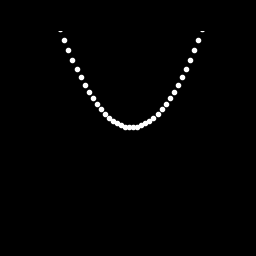

In [5]:
from google.colab.patches import cv2_imshow

cv2_imshow( x_data[0] )

In [6]:
x_data = np.array( x_data )
y_data = np.array( y_data )
x_test = np.array( x_test )

x_data = x_data.astype( 'float32' ) / 255.
y_data = y_data.astype( 'float32' ) / 255.
x_test = x_test.astype( 'float32' ) / 255.

x_data = np.reshape( x_data, ( len( x_data ), IMG_SIZE, IMG_SIZE, 1 ) )
y_data = np.reshape( y_data, ( len( y_data ), IMG_SIZE, IMG_SIZE, 1 ) )
x_test = np.reshape( x_test, ( len( x_test ), IMG_SIZE, IMG_SIZE, 1 ) )

In [7]:
x_data.shape

(30, 256, 256, 1)

# Build Models

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
BUFFER_SIZE = 30
BATCH_SIZE = 10
train_dataset = tf.data.Dataset.from_tensor_slices(x_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Build Generator Model

In [10]:
generator = keras.Sequential( name = 'generator' )

generator.add( layers.Input( [ IMG_SIZE, IMG_SIZE, 1 ] ) )

# output shape ( 128, 128, 32 )
generator.add( layers.Conv2DTranspose( 32, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 64, 64, 64 )
generator.add( layers.Conv2DTranspose( 64, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

 # output shape ( 128, 128, 64 )
generator.add( layers.Conv2DTranspose( 128, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 32 )
generator.add( layers.Conv2DTranspose( 256, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 1 )
generator.add( layers.Conv2DTranspose( 1, ( 5, 5 ), padding = 'same', use_bias = False, activation = 'tanh' ) )

In [11]:
# generator.compile( )
# generator.summary()

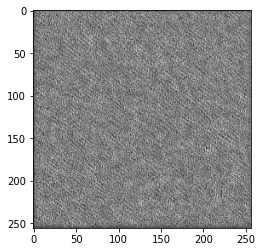

In [12]:
noise = tf.random.normal( [ 1, IMG_SIZE, IMG_SIZE, 1 ] )
generated_image = generator( noise, training = False )

plt.imshow( generated_image[ 0, :, :, 0 ], cmap = 'gray' )

In [13]:
generated_image.shape

TensorShape([1, 256, 256, 1])

## Build Discriminator Model

In [14]:
discriminator = keras.Sequential( name = 'discriminator' )

discriminator.add( layers.Conv2D( 32, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same',
                                 input_shape = [ IMG_SIZE, IMG_SIZE, 1 ] ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 64, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 128, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Flatten( ) )
discriminator.add( layers.Dense( 1 ) )

In [15]:
decision = discriminator( generated_image )
print( decision )

tf.Tensor([[-0.00356953]], shape=(1, 1), dtype=float32)


# Train the models

## Define loss and optimizers

In [16]:
cross_entropy = keras.losses.BinaryCrossentropy( from_logits = True )

In [17]:
def discriminator_loss( real_output, fake_output ):
    real_loss = cross_entropy( tf.ones_like( real_output ), real_output )
    fake_loss = cross_entropy( tf.zeros_like( fake_output ), fake_output )

    total_loss = real_loss + fake_loss
    
    return total_loss

def generator_loss( fake_output ):
    return cross_entropy( tf.ones_like( fake_output ), fake_output )

In [18]:
generator_optimizer = tf.keras.optimizers.Adam( 1e-4 )
discriminator_optimizer = tf.keras.optimizers.Adam( 1e-4 )

## Define Hyperparameter

In [19]:
EPOCHS = 1000
noise_dim = 100
num_examples_to_generate = 16

## Define Train Function

In [20]:
os.chdir( CURR_DIR + 'drive/MyDrive/Result_Images_1000/')

In [21]:
def generate_and_save_images( epochs ):
    predictions = generator( x_test, training = False )

    fig, ax = plt.subplots( 1, 3, figsize = ( 16, 12 ) )
    for i in range( predictions.shape[0] ):
        ax[i].imshow( tf.reshape( predictions[i], ( IMG_SIZE, IMG_SIZE ) ) )

    plt.savefig( 'Result_at_epoch_{:04d}.png'.format( epochs ) )
    plt.show()

In [22]:
@tf.function
def train_step( images ):
    noise = tf.random.normal( [ BATCH_SIZE, IMG_SIZE, IMG_SIZE, 1 ] )

    with tf.GradientTape( ) as gen_tape, tf.GradientTape( ) as disc_tape:
      generated_images = generator( noise, training = True )

      real_output = discriminator( images, training = True )
      fake_output = discriminator( generated_images, training = True )

      gen_loss = generator_loss( fake_output )
      disc_loss = discriminator_loss( real_output, fake_output )

    gradients_of_generator = gen_tape.gradient( gen_loss, generator.trainable_variables )
    gradients_of_discriminator = disc_tape.gradient( disc_loss, discriminator.trainable_variables )

    generator_optimizer.apply_gradients( zip( gradients_of_generator, generator.trainable_variables ) )
    discriminator_optimizer.apply_gradients( zip( gradients_of_discriminator, discriminator.trainable_variables ) )

def train( dataset, epochs ):
  plt.gray()
  for epoch in range( epochs ):
    start = time.time( )

    for image_batch in dataset:
      train_step( image_batch )

    if ( epoch % 50 == 0 ):
        display.clear_output(wait=True)
        generate_and_save_images( epoch + 1 )

    print( 'Time for epoch {} is {} sec'.format( epoch + 1, time.time( ) - start ) )

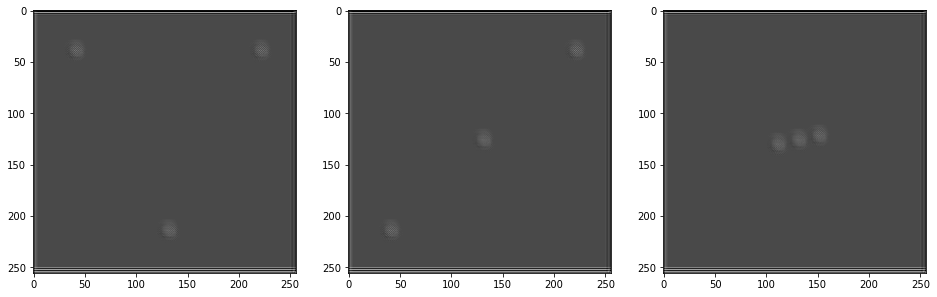

Time for epoch 951 is 3.0529277324676514 sec
Time for epoch 952 is 1.216306209564209 sec
Time for epoch 953 is 1.7953660488128662 sec
Time for epoch 954 is 1.9364089965820312 sec
Time for epoch 955 is 2.065606117248535 sec
Time for epoch 956 is 1.365377426147461 sec
Time for epoch 957 is 1.7951390743255615 sec
Time for epoch 958 is 1.788496732711792 sec
Time for epoch 959 is 1.7956953048706055 sec
Time for epoch 960 is 1.787611722946167 sec
Time for epoch 961 is 1.9664251804351807 sec
Time for epoch 962 is 1.6196162700653076 sec
Time for epoch 963 is 1.9799916744232178 sec
Time for epoch 964 is 1.6025454998016357 sec
Time for epoch 965 is 2.373377799987793 sec
Time for epoch 966 is 1.2162854671478271 sec
Time for epoch 967 is 1.7918593883514404 sec
Time for epoch 968 is 2.003479242324829 sec
Time for epoch 969 is 1.5806396007537842 sec
Time for epoch 970 is 1.7946126461029053 sec
Time for epoch 971 is 1.7934460639953613 sec
Time for epoch 972 is 1.7934012413024902 sec
Time for epoch 97

In [23]:
train( train_dataset, EPOCHS )

# Test Model

<Figure size 432x288 with 0 Axes>

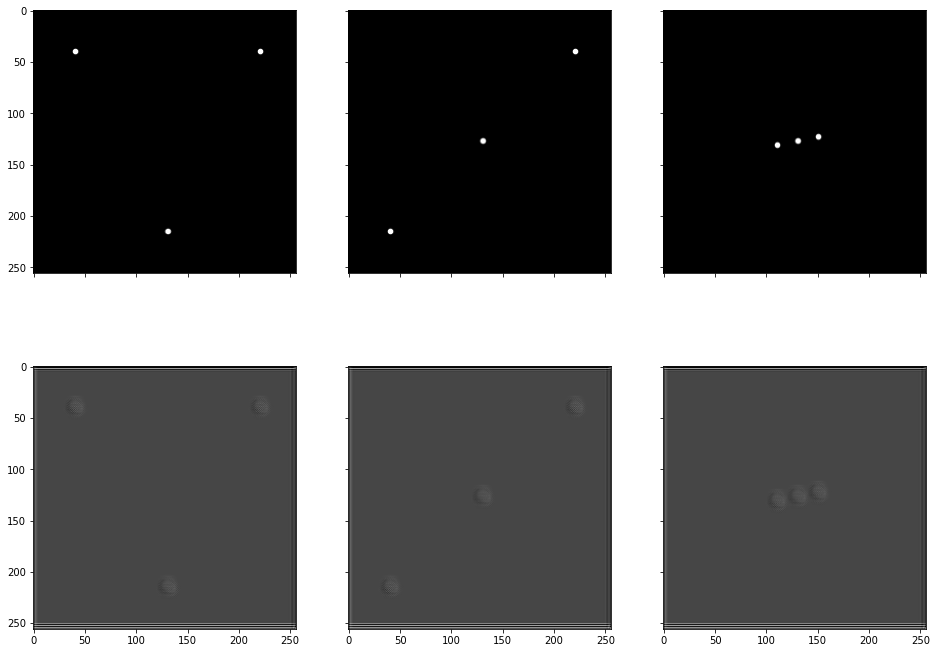

In [24]:
predicted_images = generator( x_test )
plt.gray()
n = 3
fig, ax = plt.subplots( 2, 3, True, True, figsize = ( 16, 12 ) )
for i in range( n ):
    ax[0][i].imshow( x_test[i].reshape( 256, 256 ) )

    ax[1][i].imshow( tf.reshape( predicted_images[i], ( 256, 256 ) ) )
plt.savefig( 'Result_Final.png' )